In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Check dataset dimensions
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1122s 7us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Define the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

C:\Users\927472\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.3525 - loss: 1.7488 - val_accuracy: 0.5625 - val_loss: 1.2189
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.5780 - loss: 1.1936 - val_accuracy: 0.6280 - val_loss: 1.0491
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6459 - loss: 1.0030 - val_accuracy: 0.6523 - val_loss: 0.9745
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 56s 36ms/step - accuracy: 0.6853 - loss: 0.8963 - val_accuracy: 0.6655 - val_loss: 0.9501
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7175 - loss: 0.8125 - val_accuracy: 0.6860 - val_loss: 0.9086
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7337 - loss: 0.7617 - val_accuracy: 0.6988 - val_loss: 0.8742
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7535 - loss: 0.7009 - val_accuracy: 0.7012 - val_loss: 0.8818
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7721 -

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7094 - loss: 0.8571
Test Loss: 0.8722826242446899
Test Accuracy: 0.7107999920845032


In [11]:
# Predict and visualize results
y_predicted = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [12]:
# Confusion Matrix
y_predicted_labels = np.argmax(y_predicted, axis=1)
y_test_labels = y_test.flatten()

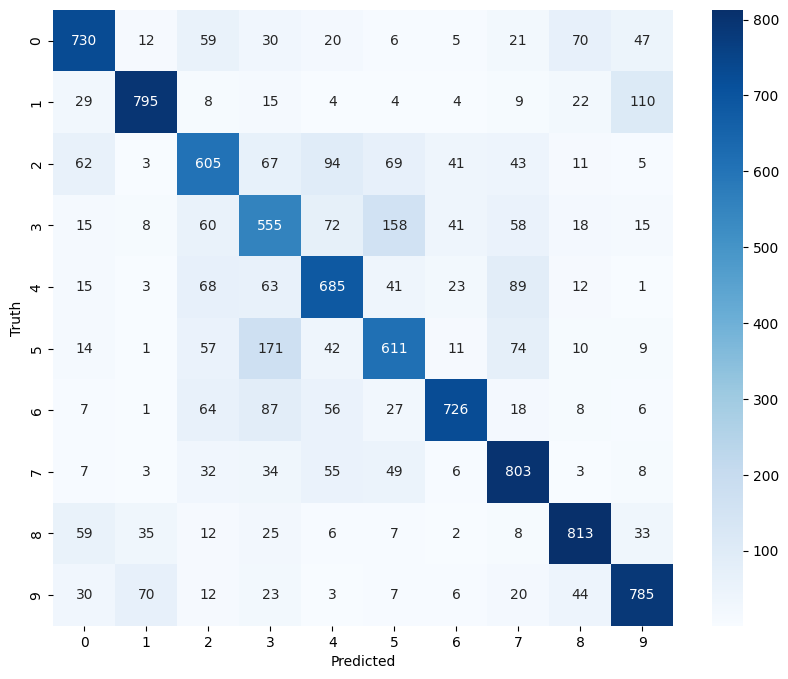

In [13]:
cm = tf.math.confusion_matrix(labels=y_test_labels, predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()